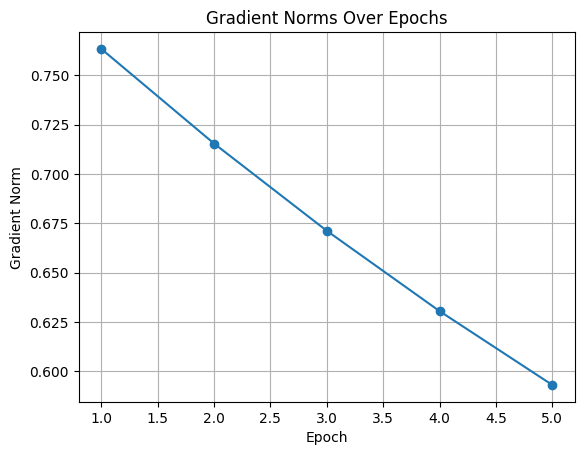

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define a simple two-layer neural network
class TwoLayerNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(TwoLayerNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))  # Use Sigmoid activation
        x = self.fc2(x)
        return x

# Initialize the network, loss function, and optimizer
input_size = 10
hidden_size = 10
output_size = 1
model = TwoLayerNN(input_size, hidden_size, output_size)

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Dummy data
x = torch.randn(10, input_size)
y = torch.randn(10, output_size)

# Store gradient norms
gradient_norms = []

# Training loop
for epoch in range(5):  # Train for 5 epochs
    optimizer.zero_grad()  # Zero the gradients
    outputs = model(x)  # Forward pass
    loss = criterion(outputs, y)  # Compute loss
    loss.backward()  # Backward pass

    # Calculate and store gradient norm
    total_norm = 0
    for param in model.parameters():
        if param.grad is not None:
            param_norm = param.grad.data.norm(2)
            total_norm += param_norm.item() ** 2
    total_norm = total_norm ** 0.5
    gradient_norms.append(total_norm)

    optimizer.step()  # Update weights

# Plot gradient norms
plt.plot(range(1, len(gradient_norms) + 1), gradient_norms, marker='o')
plt.title('Gradient Norms Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Gradient Norm')
plt.grid(True)
plt.show()